# <center><font color='#00b33c'>A new ride-sharing company in Chicago</font></center>

<center><img src="Taxi_Cab_vector_2.jpg"></center>

### Contents <a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p> 
* [Part 1. General information](#Part_1)
* [Part 2. Data preprocessing](#Part_2)
* [Part 3. Test Hypotesis](#Part_3)
<p> </p>     
* [General Conclusion](#General_Conclusion)

## Project Description<a class="anchor" id="Project_description"></a>

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

## Part 1. General information <a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

Let's load the libraries required for data manipulation and analysis.

In [1]:
#import packages for data manipulations
import pandas as pd
import numpy as np
#library of statistical functions
from scipy import stats as st
#import packages for data plotting
import matplotlib.pyplot as plt
#import seaborn as sns
#!pip install squarify
import squarify

We have three datasets created in a database.

In [2]:
#source of the data:
#taxi companies
taxi = pd.read_csv("project_sql_result_01.csv")
#rides to Chicago neighborhoods
location = pd.read_csv("project_sql_result_04.csv")
#rides to airport
to_airport = pd.read_csv("project_sql_result_07.csv")

In [3]:
#structure of the dataset
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


**Dataset contains:**<br>
- **company_name** - taxi company name<br>
- **trips_amount** - the number of rides for each taxi company on November 15-16, 2017

In [4]:
#10 rows for quickly testing dataset
taxi.sample(10)

,company_name,trips_amount
49,5074 - 54002 Ahzmi Inc,16
44,2092 - 61288 Sbeih company,27
17,Chicago Medallion Management,1955
59,4053 - 40193 Adwar H. Nikola,7
12,Dispatch Taxi Affiliation,3355
19,Chicago Medallion Leasing INC,1607
18,24 Seven Taxi,1775
47,4615 - 83503 Tyrone Henderson,21
1,Taxi Affiliation Services,11422
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
#structure of the dataset
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


**Dataset contains:**<br>
- **dropoff_location_name** - Chicago neighborhoods where ride was ended
- **average_trips** - the average number of rides to neighborhood in November 2017

In [6]:
#10 rows for quickly testing dataset
location.sample(10)

,dropoff_location_name,average_trips
18,West Town,516.400000
6,Grant Park,2068.533333
21,North Center,393.266667
62,Brighton Park,19.466667
50,South Shore,40.533333
12,"Little Italy, UIC",863.700000
84,West Pullman,6.466667
4,O'Hare,2546.900000
13,Uptown,849.666667
89,Mount Greenwood,3.137931


In [7]:
#structure of the dataset
to_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


**Dataset contains** the rides from Loop to O'Hare International Airport. These are the table fields:<br>
- **start_ts** - pickup date and time
- **weather_conditions** - weather conditions at the moment the ride was started
- **duration_seconds** - ride duration in seconds

According to the description of the dataset, I will convert float type with integer.

In [8]:
#convert float to integer type
to_airport['duration_seconds'] = to_airport['duration_seconds'].astype('int')

#10 rows for quickly testing dataset
to_airport.sample(10)

,start_ts,weather_conditions,duration_seconds
582,2017-11-04 17:00:00,Bad,2330
978,2017-11-18 08:00:00,Bad,1620
125,2017-11-11 08:00:00,Good,1380
682,2017-11-04 06:00:00,Good,1267
955,2017-11-04 18:00:00,Bad,1775
105,2017-11-11 09:00:00,Good,1380
683,2017-11-04 17:00:00,Bad,2151
1063,2017-11-25 11:00:00,Good,0
954,2017-11-18 06:00:00,Good,1638
461,2017-11-11 12:00:00,Good,1968


Datasets do not contain missing data. The data types in datasets match the content.

## Step 2. Data preprocessing <a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

In this step, let's look at the content of the datasets in more detail and define the patterns.

In [9]:
#general statistic
taxi.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Statistics show a big difference between the mean and median values. Let's see the distribution of data.

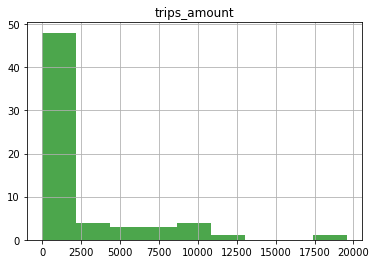

In [10]:
#histogram of distribution
taxi.hist(bins=9, color='green', alpha = 0.7);

The graph shows that the distribution of the data deviates strongly to the right. This distribution is consistent with the meaning of the content. We also have an outlier.<br>
Let's look at the number of trips made by different companies.

In [11]:
#total number of trips in the dataset
sum_trips = taxi['trips_amount'].sum()

#percentage of trips by each company from the total
taxi['percentage_of_trips']= taxi['trips_amount']/sum_trips *100

Let's select companies whose percentage of trips is more than 1% of the total number of trips in the dataset.

In [12]:
#dataset for plotting
df = taxi[taxi['percentage_of_trips']>1].sort_values('trips_amount', ascending=True)

print("Total number of taxi companies - ", taxi.shape[0])
print("The companies whose percentage of trips is more than 1% of the total number - ", df.shape[0])

Total number of taxi companies -  64
The companies whose percentage of trips is more than 1% of the total number -  22


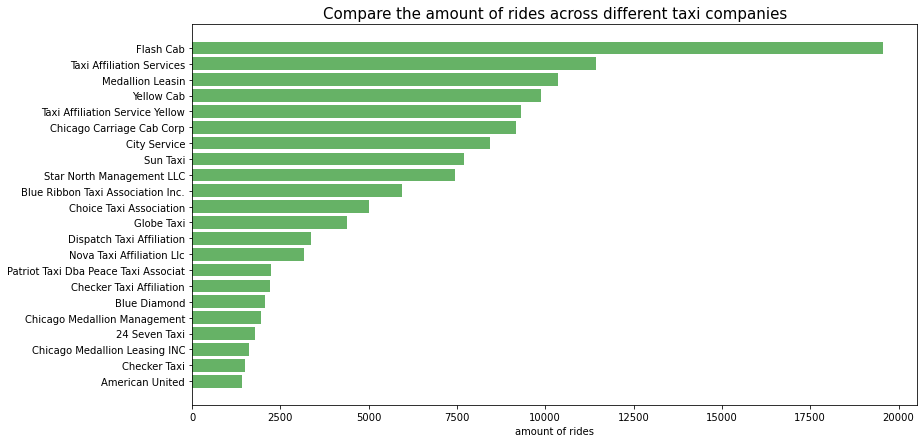

In [13]:
#params
fig = plt.figure(figsize = (13, 7))
ax = fig.add_subplot()
ax.set_title('Compare the amount of rides across different taxi companies', fontdict={'size':15});
ax.set_xlabel('amount of rides');
x= df.company_name
y= df.trips_amount
#barplot graph
ax.barh(x, y, color = "green", alpha = 0.6);

The graph shows that the majority of trips are made by Flash Cab.

Consider the data by location.

In [14]:
#general statistic
location.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


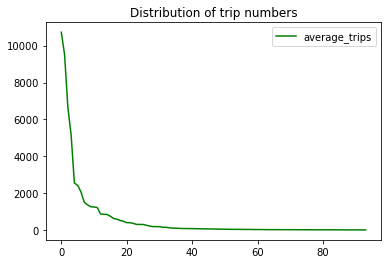

In [15]:
#plot
location.plot(color='green').set_title('Distribution of trip numbers');

We see a strong difference between the average number of trips to various Chicago neighborhoods.<br>
Let's convert the data into percentages.

In [16]:
#sum of average number of trips in the dataset
sum_trips = location['average_trips'].sum()

#percentage of trips in each direction
location['percentage_of_trips']= location['average_trips']/sum_trips *100

Let's see which direction is the most popular.

In [17]:
#dataset for plotting
df = location[location['percentage_of_trips']>1].sort_values('average_trips', ascending=True)

print("Total number of neighborhoods in Chicago,IL - ", location.shape[0])
print("Destinations where the average percentage of trips is over 1% - ", df.shape[0])

Total number of neighborhoods in Chicago,IL -  94
Destinations where the average percentage of trips is over 1% -  18


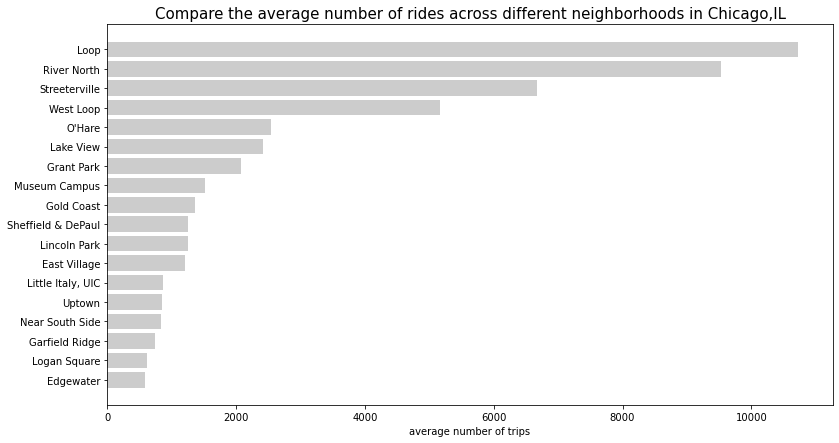

In [18]:
#params
fig = plt.figure(figsize = (13, 7))
ax = fig.add_subplot()
ax.set_title('Compare the average number of rides across different neighborhoods in Chicago,IL'
             , fontdict={'size':15});
ax.set_xlabel('average number of trips');
x= df.dropoff_location_name
y= df.average_trips
#barplot graph
ax.barh(x, y, color = "grey", alpha = 0.4);

The most popular travel destination is Loop.

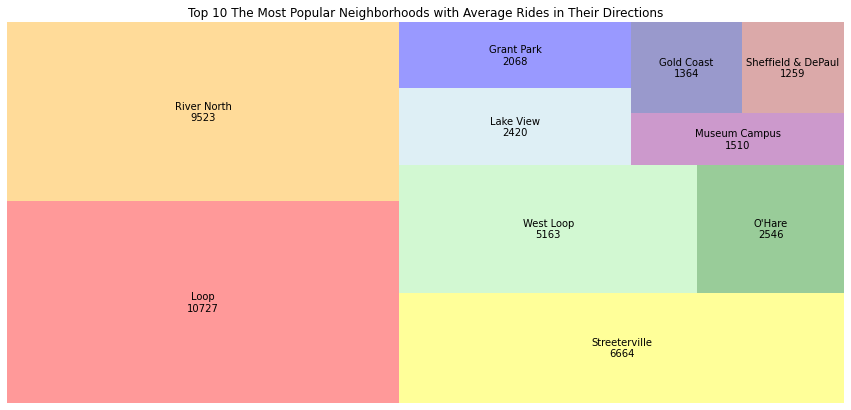

In [19]:
# the top 10 neighborhoods in terms of drop-offs
colors = ['red','orange','yellow','lightgreen','green','lightblue','blue','purple','navy','brown']
df = location.nlargest(10, columns='average_trips')
sizes = df['average_trips'].tolist()
labels = df.apply(lambda x: str(x[0])+'\n'+str(int(x[1])),axis=1)

plt.figure(figsize=(15,7))
plt.axis('off')
plt.title('Top 10 The Most Popular Neighborhoods with Average Rides in Their Directions')
squarify.plot(sizes=sizes,label=labels,alpha=.4, color=colors);
plt.show()

Consider the taxi ride data from Loop to O'Hare International Airport.

In [20]:
#general statistic
to_airport.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


We have a minimum value of 0. Let's see the data distribution.

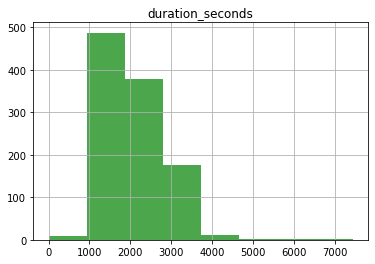

In [21]:
#histogram of distribution
to_airport.hist(bins=8, color='green', alpha = 0.7);

Let's remove anomalies and outliers to improve the quality of further analysis.

In [22]:
#filtered dataset
filtered_to_airport = to_airport.loc[(to_airport['duration_seconds']>0)&(to_airport['duration_seconds']<5500)]

In [23]:
print('Average travel time is', round(filtered_to_airport.duration_seconds.mean()/60,1),'minutes')

Average travel time is 34.6 minutes


## Part 3. Test Hypotesis<a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

Our task here is to check this sentence:<br>
_The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays_

The null hypothesis H₀ is always stated with an equal sign, so:<br>
H₀ - Average travel times in rainy and non-rainy weather are the same.

The alternative hypothesis, H₁, is based on H₀, so:<br>
H₁ - Average travel times in rainy and non-rainy weather are differ.

The significant level is the probability of rejecting the null hypothesis. I will use the significant level = 0.05, because a p-value less than 0.05 (typically ≤ 0.05) is statistically significant.

I will apply a scipy.stats.ttest_ind method. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [24]:
def ttest(sample_1, sample_2, is_equal_var):
    #this function perform a standard independent 2 sample test
    # or Welch’s t-test, which does not assume equal population variance
    
    alpha = .05 #The significant level

    results = st.ttest_ind(
            sample_1, 
            sample_2,
            equal_var= is_equal_var)

    #if the p-value is less than alpha, we reject the hypothesis
    print('p-value: ', results.pvalue)
 
    if (results.pvalue < alpha):
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")

In [25]:
#dataset of rides in rainy weather
df_1 = filtered_to_airport.loc[(filtered_to_airport['weather_conditions']=='Bad')]['duration_seconds']
#dataset of rides in non-rainy weather
df_2 = filtered_to_airport.loc[(filtered_to_airport['weather_conditions']=='Good')]['duration_seconds']

Let's determine the sample size.

In [26]:
#count sample size
sample_size_1 = df_1.count()
sample_size_2 = df_2.count()

if (sample_size_1 <= sample_size_2):
    sample_size= sample_size_1
else:
    sample_size= sample_size_2  
    
print('Sample size:', sample_size)
list_1 = df_1.sample(sample_size).tolist()
list_2 = df_2.sample(sample_size).tolist()

Sample size: 180


Let's determine the variances.

In [27]:
#variance
var_1 = np.var(list_1)
var_2 = np.var(list_2)
print('Variance of average duration of rides in rainy weather - ',var_1)
print('Variance of average duration of rides in non-rainy weather - ',var_2)

Variance of average duration of rides in rainy weather -  517403.5633024691
Variance of average duration of rides in non-rainy weather -  537312.1818209876


In [28]:
if (var_1 == var_2):
    is_equal_variance = True  #perform a standard independent 2 sample test
else:    
    is_equal_variance = False #perform Welch’s t-test

#t-test
ttest( list_1, list_2, is_equal_variance)

p-value:  2.7688377475183004e-09
We reject the null hypothesis


The p-value shows less than 1% probability of a null hypothesis.

In [29]:
print('Average travel time in rainy weather is', round(df_1.mean()/60,1),'minutes')
print('Average travel time in non-rainy weather is', round(df_2.mean()/60,1),'minutes')

Average travel time in rainy weather is 40.5 minutes
Average travel time in non-rainy weather is 33.4 minutes


## General conclusion<a class="anchor" id="General_conclusion"></a>
[Go back to the Contents](#contents)

After examining the data, we can say that the largest number of trips are made by the Flash Cab company. Their values are 1.7 times higher than those of the closest competitor.<br>
The most popular travel destinations are Loop, River North, Streeterville and West Loop. The average number of trips to these neighborhoods is significantly higher than the rest.<br>
The hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays has been confirmed.<br> 
Average travel time in rainy weather is 40.5 minutes, in non-rainy weather - 33.4 minutes.